# Web Scraping y visualización de datos

Realizar el WebScraping

In [2]:
# Importar librerias
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://genshin-impact.fandom.com/wiki/Character/Comparison"
# Peticcion HTTP
html_data = requests.get(url)
if html_data.status_code == 200:
    print("Peticcion exitosa:",html_data.status_code)
else:
    print("Peticcion Fallida:", html_data.status_code)

# Armar el arbol de parseo
soup = BeautifulSoup(html_data.text, "html.parser")

# DataFrame
df = pd.DataFrame(columns=["Name","HP","ATK","Defense","Ascension Stat","Ascension Stat Value%"])

# Realziar las busquedas

tabla = soup.find("tbody").find_all("tr")[1:]

for row in tabla:
    col = row.find_all("td")
    name = col[1].text
    hp = col[2].text
    atk = col[3].text
    defe = col[4].text
    asce_stat = col[5].text
    asce_stat_value = col[6].text
    
    # Actualizar data
    df = df._append({"Name":name.rstrip(),"HP":hp.rstrip().replace(",",""),"ATK":atk.rstrip(),"Defense":defe.rstrip(),"Ascension Stat":asce_stat.rstrip(),"Ascension Stat Value%":asce_stat_value.rstrip().replace("%","")}, ignore_index=True) 

Peticcion exitosa: 200


Imprimir DataFrame

In [3]:
df.head(10)

,Name,HP,ATK,Defense,Ascension Stat,Ascension Stat Value%
0,Albedo,13225,251,876,Geo DMG Bonus,28.8
1,Alhaitham,13348,313,781,Dendro DMG Bonus,28.8
2,Aloy,10898,233,676,Cryo DMG Bonus,28.8
3,Amber,9461,223,600,ATK,24.0
4,Arataki Itto,12858,227,959,CRIT Rate,19.2
5,Arlecchino,13103,342,764,CRIT DMG,38.4
6,Baizhu,13348,192,499,HP,28.8
7,Barbara,9787,159,668,HP,24.0
8,Beidou,13049,225,648,Electro DMG Bonus,24.0
9,Bennett,12397,191,771,Energy Recharge,26.8


Comprobar tipos de datos del Dataframe

In [4]:
# Tipo de dato columnas
print("Tipo de dato de Name",type(df.iloc[0,0]))
print("Tipo de dato de HP",type(df.iloc[0,1]))
print("Tipo de dato de ATK",type(df.iloc[0,2]))
print("Tipo de dato de Defense",type(df.iloc[0,3]))
print("Tipo de dato de Ascension Stat",type(df.iloc[0,4]))
print("Tipo de dato de NaAscension Stat Value%me",type(df.iloc[0,5]))

Tipo de dato de Name <class 'str'>
Tipo de dato de HP <class 'str'>
Tipo de dato de ATK <class 'str'>
Tipo de dato de Defense <class 'str'>
Tipo de dato de Ascension Stat <class 'str'>
Tipo de dato de NaAscension Stat Value%me <class 'str'>


Cambiar las columnas que corresponden a datos numericos.

In [5]:
df['HP'] = pd.to_numeric(df['HP'])
df['ATK'] = pd.to_numeric(df['ATK'])
df['Defense'] = pd.to_numeric(df['Defense'])
df['Ascension Stat Value%'] = pd.to_numeric(df['Ascension Stat Value%'])

Volvemos a comprobar los tipos de datos de las columnas.

In [6]:
# Tipo de dato columnas
print("Tipo de dato de Name",type(df.iloc[0,0]))
print("Tipo de dato de HP",type(df.iloc[0,1]))
print("Tipo de dato de ATK",type(df.iloc[0,2]))
print("Tipo de dato de Defense",type(df.iloc[0,3]))
print("Tipo de dato de Ascension Stat",type(df.iloc[0,4]))
print("Tipo de dato de NaAscension Stat Value%me",type(df.iloc[0,5]))

Tipo de dato de Name <class 'str'>
Tipo de dato de HP <class 'numpy.int64'>
Tipo de dato de ATK <class 'numpy.int64'>
Tipo de dato de Defense <class 'numpy.int64'>
Tipo de dato de Ascension Stat <class 'str'>
Tipo de dato de NaAscension Stat Value%me <class 'numpy.float64'>


Gráfica de barras para los 20 primeros presonajes en relación de su ataque y defensa.

In [7]:
df.set_index("Name", inplace=True)

In [8]:
df.head()

,HP,ATK,Defense,Ascension Stat,Ascension Stat Value%
Name,,,,,
Albedo,13225,251,876,Geo DMG Bonus,28.8
Alhaitham,13348,313,781,Dendro DMG Bonus,28.8
Aloy,10898,233,676,Cryo DMG Bonus,28.8
Amber,9461,223,600,ATK,24.0
Arataki Itto,12858,227,959,CRIT Rate,19.2


In [9]:
data = df[0:20]

In [10]:
data.shape

(20, 5)

In [11]:
# Libreria necesaria
import numpy as np

In [12]:
# Para la variable x de la grafica
x= np.arange(data.index.size)

In [13]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [14]:
# Variable para el ancho de las barras
bar_width = 0.40

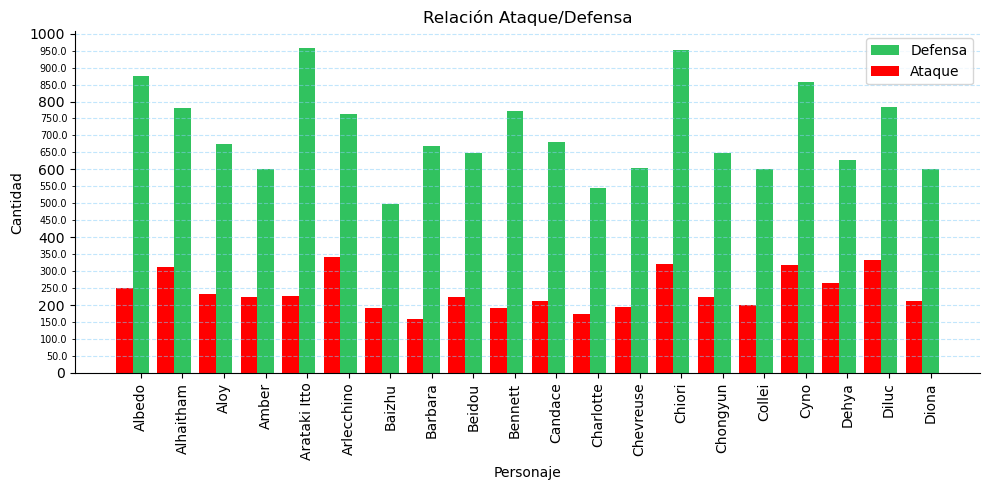

In [15]:
# Grafica de barras
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
fig,ax = plt.subplots(figsize=(10, 5), dpi=100) # Ventana de 1000x500

ax.bar(x,data['Defense'], bar_width, color='#31c25f', label= 'Defensa')
ax.bar(x-bar_width,data['ATK'], bar_width, color='red', label= "Ataque" )

ax.set_title('Relación Ataque/Defensa')
ax.set_xlabel("Personaje")
ax.set_ylabel("Cantidad")

ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(data.index, rotation = 90)

###
ax.yaxis.set_minor_locator(MultipleLocator(50))  # Y: separación cada 50 unidades
ax.yaxis.grid(which='minor', linestyle='dashed', color='lightskyblue',alpha=0.5)
ax.yaxis.grid(color='lightskyblue', linestyle='dashed', alpha=0.5)
ax.yaxis.set_minor_formatter('{x:}')
ax.tick_params(axis='y', which='minor', labelsize=7)
###

ax.spines['right'].set_visible(False)  # ocultar borde derecho
ax.spines['top'].set_visible(False)    # ocultar borde superior

fig.tight_layout()  # ajustar elementos al tamaño de la figura

Ahora, una gráfica circular para conocer la cantidada de personajes que ascienden con un tipo de stat específico.

In [16]:
df.head()

,HP,ATK,Defense,Ascension Stat,Ascension Stat Value%
Name,,,,,
Albedo,13225,251,876,Geo DMG Bonus,28.8
Alhaitham,13348,313,781,Dendro DMG Bonus,28.8
Aloy,10898,233,676,Cryo DMG Bonus,28.8
Amber,9461,223,600,ATK,24.0
Arataki Itto,12858,227,959,CRIT Rate,19.2


In [17]:
df.shape

(81, 5)

Necesitamos la columna de Ascension Stat para cada uno de los personajes. 

In [18]:
ascension_data = df['Ascension Stat']

In [19]:
ascension_data.head()

Name
Albedo             Geo DMG Bonus
Alhaitham       Dendro DMG Bonus
Aloy              Cryo DMG Bonus
Amber                        ATK
Arataki Itto           CRIT Rate
Name: Ascension Stat, dtype: object

Contamos la cantidad de valores unicos para cada stat.

In [20]:
ascension_data.nunique()

16

In [21]:
counts = ascension_data.value_counts()

In [22]:
counts

Ascension Stat
ATK                   16
HP                    12
CRIT DMG              11
CRIT Rate             10
Energy Recharge        6
Elemental Mastery      6
Geo DMG Bonus          4
Anemo DMG Bonus        3
Dendro DMG Bonus       2
Cryo DMG Bonus         2
Healing Bonus          2
Pyro DMG Bonus         2
Hydro DMG Bonus        2
Electro DMG Bonus      1
DEF                    1
Physical DMG Bonus     1
Name: count, dtype: int64

Converitmos la información a un Dataframe.

In [23]:
data_ascen = counts.to_frame()

In [24]:
data_ascen

,count
Ascension Stat,
ATK,16
HP,12
CRIT DMG,11
CRIT Rate,10
Energy Recharge,6
Elemental Mastery,6
Geo DMG Bonus,4
Anemo DMG Bonus,3
Dendro DMG Bonus,2


In [25]:
data_ascen.shape

(16, 1)

In [26]:
data_ascen.sum()

count    81
dtype: int64

Con esto ya podemos realizar la gráfica circular.

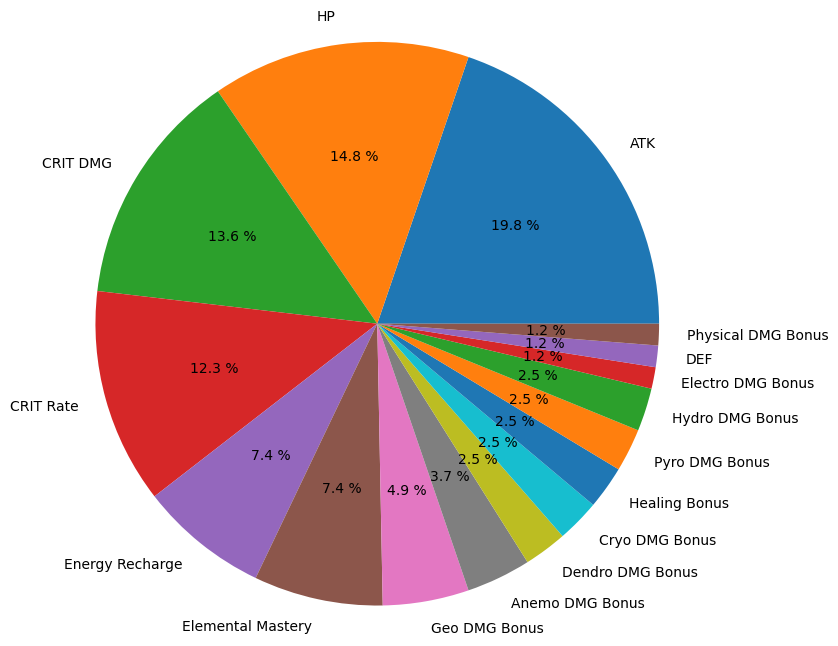

In [27]:
fig, ax = plt.subplots(figsize=(8,8), dpi=100)

ax.pie(data_ascen['count'], labels=data_ascen.index.values, autopct="%0.1f %%")
ax.axis("equal")
plt.show()

<hr/>

## Autor:

Jonathan Palan

## Carga y cambios

| Date             | Version | By             |  Description                                  |
| -----------------| ------- | ---------------| ----------------------------------------------|
| 2024-05-03      | 0.1     | Jonathan Palan | Web scraping y visualizacion de datos personajes de Genshin Impact|

<hr/>